### Importing modules

In [1]:
# Module to process images
import skimage
from skimage import data, io

In [2]:
# Module to process arrays
import numpy as np

In [3]:
# Module to plot the images
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# This command allows to plot directly on the notbook (use %matplotlib notebook if you want to interact with the image)
%matplotlib inline

#### Images available
* ./images/cadaster_sample.jpg (color)
* ./images/document.jpg (grayscale)

### Load an image and show it in the notebook

In [4]:
# Get the image from scikit-image and create the PNG file
f = data.chelsea()
io.imsave('my_image.png', f)

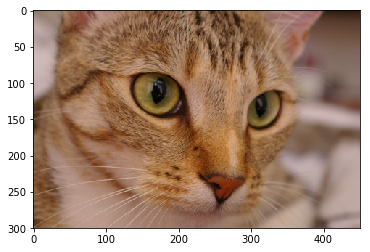

In [5]:
# Load it and show
image = io.imread('my_image.png')
plt.imshow(image)

### Color channels

In [6]:
from skimage import color

In [7]:
# Get the shape of the image (height, width, channels)
image.shape

(300, 451, 3)

In [8]:
# Get the first channel of the image and its shape
channel_red = image[:, :, 0]
channel_red.shape

(300, 451)

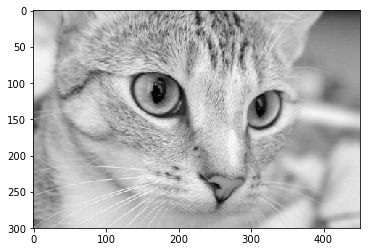

In [9]:
# Plot the first channel of the image (red)
plt.imshow(channel_red, cmap='gray')

(-0.5, 450.5, 299.5, -0.5)

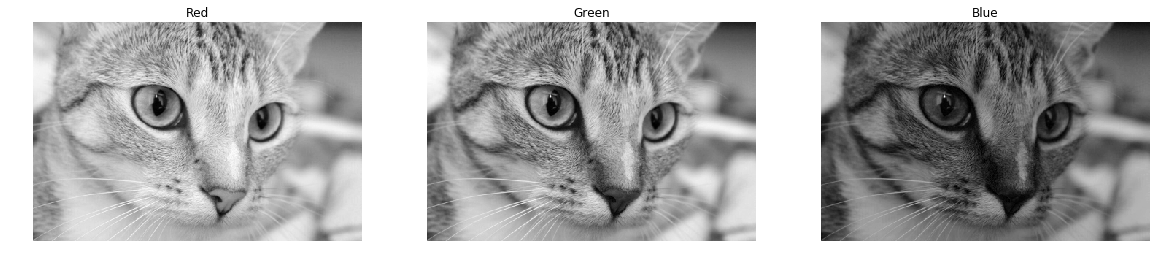

In [10]:
# Compare the 3 channels 
channel_green = image[:,:,1]
channel_blue = image[:,:,2]

# Formatting plot
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('Red')
plt.imshow(channel_red, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Green')
plt.imshow(channel_green, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Blue')
plt.imshow(channel_blue, cmap='gray')
plt.axis('off')

A color pixel has 3 values corresponding to the 3 channels. When decomposing the image into channels, we can see which are the principal colors. A high value (towards white) means an important contribution of the color component to the image and a low value (toward black) means few contibution.

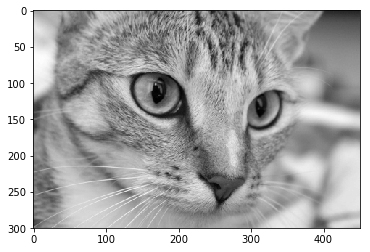

In [11]:
# Convert a color image to grayscale image
grayscale_image = color.rgb2gray(image)
plt.imshow(grayscale_image, cmap='gray')

### Image as an array

In [12]:
# We can access the pixels of the image by knowing its row and column 
# /!\ In Python, indexing starts at 0 (so first pixel is 0)
# Get the pixel in the 5th row and 7th column
pixel = image[4, 6, :]
pixel 
# The 3 values correspond to the R G and B channels

array([147, 124, 108], dtype=uint8)

Usually pixels are represented as unsigned integers between 0 and 255 (256 values encoded in 8 bits (2^8=256)), we say they have uint8 type.

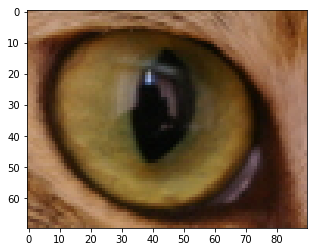

In [13]:
# Crop the image from row 81 to 150 and from column 131 to 220 
# /!\ In Python, the end index is not included so the crop is between [80,150[ and [130,220[
crop = image[80:150, 130:220, :]
plt.imshow(crop)

In [14]:
crop.shape

(70, 90, 3)

### Image transformations

In [15]:
from skimage import transform

In [16]:
# Rescale image by a factor 2
rescaled_image = transform.rescale(image, scale=2, mode='constant')
rescaled_image.shape

(600, 902, 3)

In [17]:
# Resize image to have a square size
resized_image = transform.resize(image, (200,200), mode='constant')
resized_image.shape

(200, 200, 3)

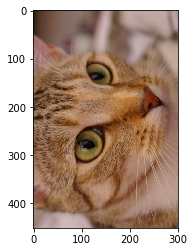

In [18]:
# Rotate image by 90° counter-clockwise
rotated_image = transform.rotate(image, 90, resize=True)
plt.imshow(rotated_image)

### Image filtering

In [19]:
from skimage import filters

#### Gaussian filter (Blur)
https://en.wikipedia.org/wiki/Gaussian_function#Multi-dimensional_Gaussian_function

In [20]:
blurred_image = filters.gaussian(image, 5, multichannel=True)

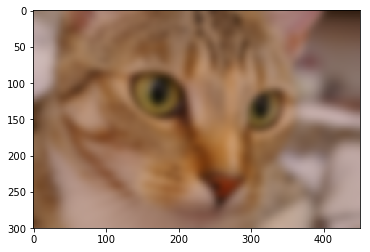

In [21]:
plt.imshow(blurred_image)

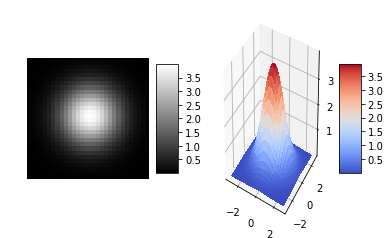

In [22]:
X = np.arange(-3, 3, 0.2)
Y = np.arange(-3, 3, 0.2)
X, Y = np.meshgrid(X, Y)
Z = (10/np.sqrt(2*np.pi)*np.exp(-(X**2/2)-(Y**2/2)))

fig = plt.figure()
# Plot 2D kernel
ax = fig.add_subplot(1, 2, 1)
ker = ax.imshow(Z, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar(ker, shrink=0.5, aspect=5)
plt.axis('off')

# Plot the surface
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### Edge detection
https://en.wikipedia.org/wiki/Sobel_operator

In [23]:
# Sobel H and Sobel V (also know as Sobel Y and Sobel X) find edges in horizontal and vertical directions
sobel_h = filters.sobel_h(grayscale_image)
sobel_v = filters.sobel_v(grayscale_image)
sobel = filters.sobel(grayscale_image)

(-0.5, 450.5, 299.5, -0.5)

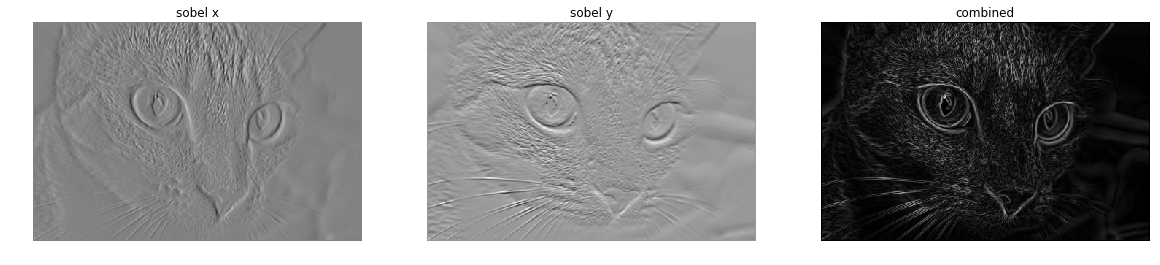

In [24]:
# Formatting plot
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('sobel x')
plt.imshow(sobel_v, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('sobel y')
plt.imshow(sobel_h, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('combined')
plt.imshow(sobel, cmap='gray')
plt.axis('off')

/home/soliveir/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


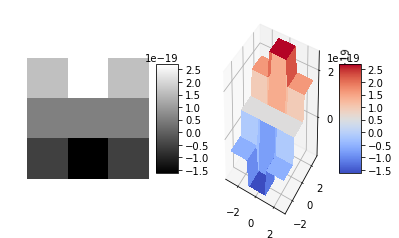

In [25]:
# Sobel kernel
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2],[-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

# Plot filter kernels

X = np.arange(-3, 3, 0.2)
Y = np.arange(-3, 3, 0.2)
X, Y = np.meshgrid(X, Y)
Z = transform.rescale(sobel_kernel_y, 10, order=0, mode='edge')

fig = plt.figure()
# Plot 2D kernel
ax = fig.add_subplot(1, 2, 1)
ker = ax.imshow(Z, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar(ker, shrink=0.5, aspect=5)
plt.axis('off')

# Plot the surface
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### Gabor filter
https://en.wikipedia.org/wiki/Gabor_filter

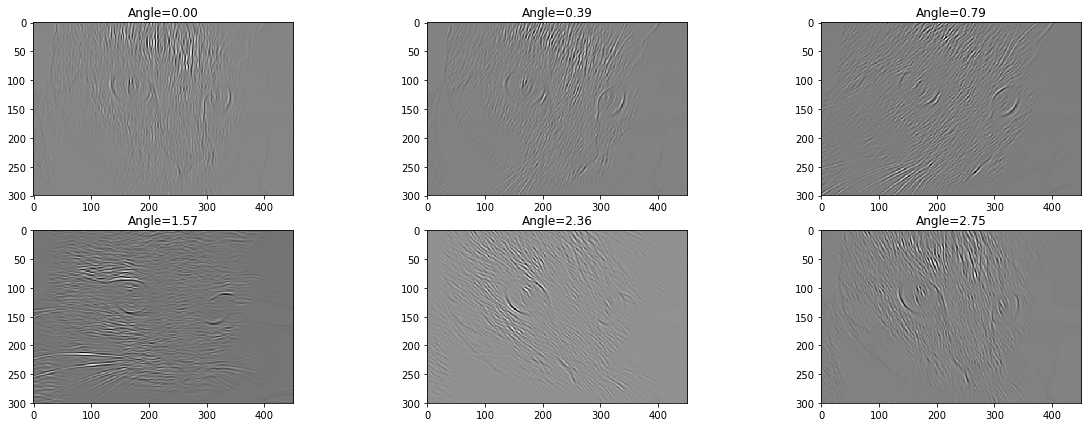

In [26]:
plt.figure(figsize=(20,7))
for i, angle in enumerate([0, np.pi/8, np.pi/4, np.pi/2, 3*np.pi/4, 7*np.pi/8]):
    plt.subplot(2,3,i+1)
    image_gabor = filters.gabor(grayscale_image, frequency=0.2, theta=angle)
    plt.title('Angle={:.02f}'.format(angle))
    plt.imshow(image_gabor[0], cmap='gray')

### Restauration module

In [27]:
from skimage import restoration

In [28]:
image = io.imread('./images/cadaster_sample.jpg')

In [29]:
# Add noise to image 
sigma = 0.155
noisy_image = skimage.util.random_noise(image[:200,:200,:], var=sigma**2) # We take a crop of the image

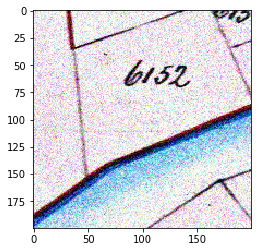

In [30]:
plt.imshow(noisy_image, cmap='gray')

In [31]:
image_denoised = restoration.denoise_nl_means(noisy_image, patch_size=7, patch_distance=11, multichannel=True)

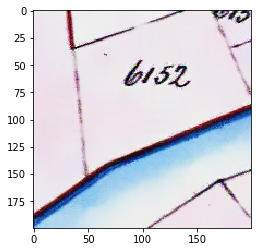

In [32]:
plt.imshow(image_denoised, cmap='gray')

In [33]:
image = io.imread('./images/page.jpg')

In [34]:
# Add noise to image 
sigma = 0.155
noisy_image = skimage.util.random_noise(image, var=sigma**2)

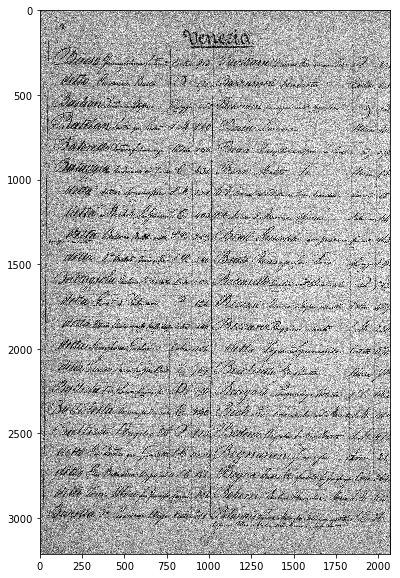

In [35]:
plt.figure(figsize=(30,10))
plt.imshow(noisy_image, cmap='gray')

In [36]:
image_denoised = restoration.denoise_tv_bregman(noisy_image, 2)

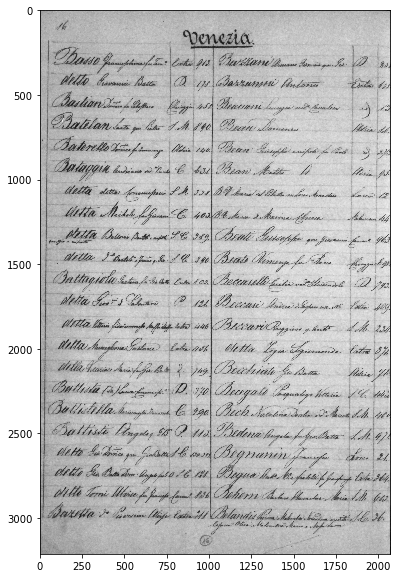

In [37]:
plt.figure(figsize=(30,10))
plt.imshow(image_denoised, cmap='gray')